In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\Machine learning 2\\onlinefraud.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### no null values

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
cleaned_df = df[['type', 'amount', 'nameOrig','nameDest','isFraud']]

In [10]:
cleaned_df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

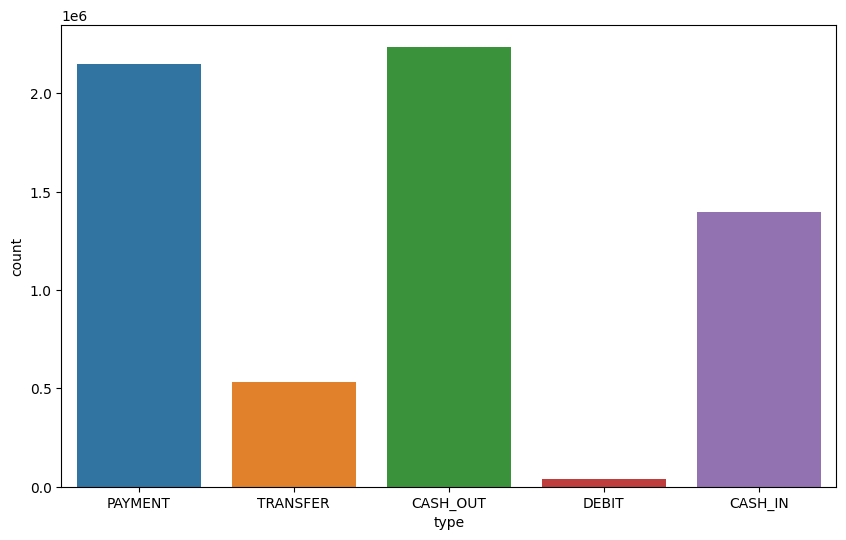

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(cleaned_df,x='type');

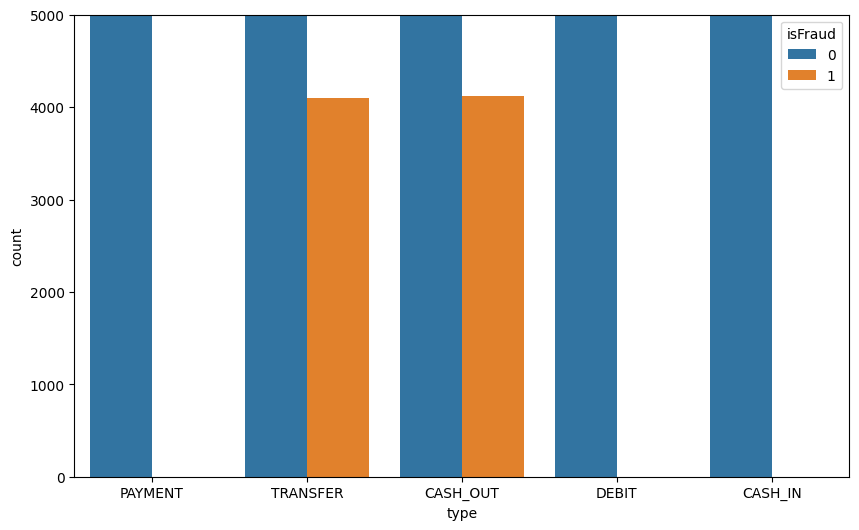

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(cleaned_df,x='type',hue='isFraud')
plt.ylim((0,5000));

In [14]:
cleaned_df.head()

,type,amount,nameOrig,nameDest,isFraud
0,PAYMENT,9839.64,C1231006815,M1979787155,0
1,PAYMENT,1864.28,C1666544295,M2044282225,0
2,TRANSFER,181.00,C1305486145,C553264065,1
3,CASH_OUT,181.00,C840083671,C38997010,1
4,PAYMENT,11668.14,C2048537720,M1230701703,0


# Data processing for modelling

In [15]:
dummy_variables=pd.get_dummies(cleaned_df['type'],drop_first=True).astype(int)

In [16]:

# Replace the 'type' column in df with the dummy variables
cleaned_df = pd.concat([cleaned_df.drop(columns=['type']), dummy_variables], axis=1)


In [17]:
cleaned_df.head()

,amount,nameOrig,nameDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,C1231006815,M1979787155,0,0,0,1,0
1,1864.28,C1666544295,M2044282225,0,0,0,1,0
2,181.00,C1305486145,C553264065,1,0,0,0,1
3,181.00,C840083671,C38997010,1,1,0,0,0
4,11668.14,C2048537720,M1230701703,0,0,0,1,0


In [18]:
cleaned_df['nameOrig_letter'] = cleaned_df['nameOrig'].str[0]

cleaned_df['nameOrig'] = cleaned_df['nameOrig'].str[1:]

In [19]:
cleaned_df

,amount,nameOrig,nameDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_letter
0,9839.64,1231006815,M1979787155,0,0,0,1,0,C
1,1864.28,1666544295,M2044282225,0,0,0,1,0,C
2,181.00,1305486145,C553264065,1,0,0,0,1,C
3,181.00,840083671,C38997010,1,1,0,0,0,C
4,11668.14,2048537720,M1230701703,0,0,0,1,0,C
...,...,...,...,...,...,...,...,...,...
6362615,339682.13,786484425,C776919290,1,1,0,0,0,C
6362616,6311409.28,1529008245,C1881841831,1,0,0,0,1,C
6362617,6311409.28,1162922333,C1365125890,1,1,0,0,0,C
6362618,850002.52,1685995037,C2080388513,1,0,0,0,1,C


In [20]:
cleaned_df['nameDest_letter'] = cleaned_df['nameDest'].str[0]

cleaned_df['nameDest'] = cleaned_df['nameDest'].str[1:]

In [21]:
cleaned_df

,amount,nameOrig,nameDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_letter,nameDest_letter
0,9839.64,1231006815,1979787155,0,0,0,1,0,C,M
1,1864.28,1666544295,2044282225,0,0,0,1,0,C,M
2,181.00,1305486145,553264065,1,0,0,0,1,C,C
3,181.00,840083671,38997010,1,1,0,0,0,C,C
4,11668.14,2048537720,1230701703,0,0,0,1,0,C,M
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,786484425,776919290,1,1,0,0,0,C,C
6362616,6311409.28,1529008245,1881841831,1,0,0,0,1,C,C
6362617,6311409.28,1162922333,1365125890,1,1,0,0,0,C,C
6362618,850002.52,1685995037,2080388513,1,0,0,0,1,C,C


In [22]:
cleaned_df['nameDest_letter'].value_counts()

nameDest_letter
C    4211125
M    2151495
Name: count, dtype: int64

so in the above we can see that the destination transaction have to codes i.e. C and M

In [23]:
cleaned_df['nameOrig_letter'].value_counts()

nameOrig_letter
C    6362620
Name: count, dtype: int64

whereas the origin of transaction only have C

# checking for the transaction code involved in fraud

In [24]:
cleaned_df[(cleaned_df['nameDest_letter'] == 'M') & (cleaned_df['isFraud'] == 1)]

,amount,nameOrig,nameDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_letter,nameDest_letter


In [25]:
cleaned_df[(cleaned_df['nameDest_letter'] == 'C') & (cleaned_df['isFraud'] == 1)]

,amount,nameOrig,nameDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_letter,nameDest_letter
2,181.00,1305486145,553264065,1,0,0,0,1,C,C
3,181.00,840083671,38997010,1,1,0,0,0,C,C
251,2806.00,1420196421,972765878,1,0,0,0,1,C,C
252,2806.00,2101527076,1007251739,1,1,0,0,0,C,C
680,20128.00,137533655,1848415041,1,0,0,0,1,C,C
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,786484425,776919290,1,1,0,0,0,C,C
6362616,6311409.28,1529008245,1881841831,1,0,0,0,1,C,C
6362617,6311409.28,1162922333,1365125890,1,1,0,0,0,C,C
6362618,850002.52,1685995037,2080388513,1,0,0,0,1,C,C


#### here we can conclude that all the transaction for destinatin with code or letter 'M' are the safest whereas all the expected fraud lies in the transaction starting from 'C'

# for model training we will only take the cases where we detected the fraud to reduce computational time and efforts 

In [26]:
fraud_cases = cleaned_df[cleaned_df['nameDest_letter'] == 'C']

In [27]:
fraud_cases['nameOrig'] = fraud_cases['nameOrig'].astype(int)

C:\Users\dell\AppData\Local\Temp\ipykernel_3744\1730446349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_cases['nameOrig'] = fraud_cases['nameOrig'].astype(int)


In [28]:
fraud_cases['nameDest'] = fraud_cases['nameDest'].astype(int)

C:\Users\dell\AppData\Local\Temp\ipykernel_3744\946255307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_cases['nameDest'] = fraud_cases['nameDest'].astype(int)


In [29]:
model_data = pd.get_dummies(fraud_cases).astype(int)

In [43]:
model_data

,amount,nameOrig,nameDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_letter_C,nameDest_letter_C
2,181,1305486145,553264065,1,0,0,0,1,1,1
3,181,840083671,38997010,1,1,0,0,0,1,1
9,5337,712410124,195600860,0,0,1,0,0,1,1
10,9644,1900366749,997608398,0,0,1,0,0,1,1
15,229133,905080434,476402209,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
6362615,339682,786484425,776919290,1,1,0,0,0,1,1
6362616,6311409,1529008245,1881841831,1,0,0,0,1,1,1
6362617,6311409,1162922333,1365125890,1,1,0,0,0,1,1
6362618,850002,1685995037,2080388513,1,0,0,0,1,1,1


In [32]:
model_data[model_data['isFraud'] == 1]

,amount,nameOrig,nameDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_letter_C,nameDest_letter_C
2,181,1305486145,553264065,1,0,0,0,1,1,1
3,181,840083671,38997010,1,1,0,0,0,1,1
251,2806,1420196421,972765878,1,0,0,0,1,1,1
252,2806,2101527076,1007251739,1,1,0,0,0,1,1
680,20128,137533655,1848415041,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
6362615,339682,786484425,776919290,1,1,0,0,0,1,1
6362616,6311409,1529008245,1881841831,1,0,0,0,1,1,1
6362617,6311409,1162922333,1365125890,1,1,0,0,0,1,1
6362618,850002,1685995037,2080388513,1,0,0,0,1,1,1


In [33]:
model_data.columns

Index(['amount', 'nameOrig', 'nameDest', 'isFraud', 'CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER', 'nameOrig_letter_C', 'nameDest_letter_C'],
      dtype='object')

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


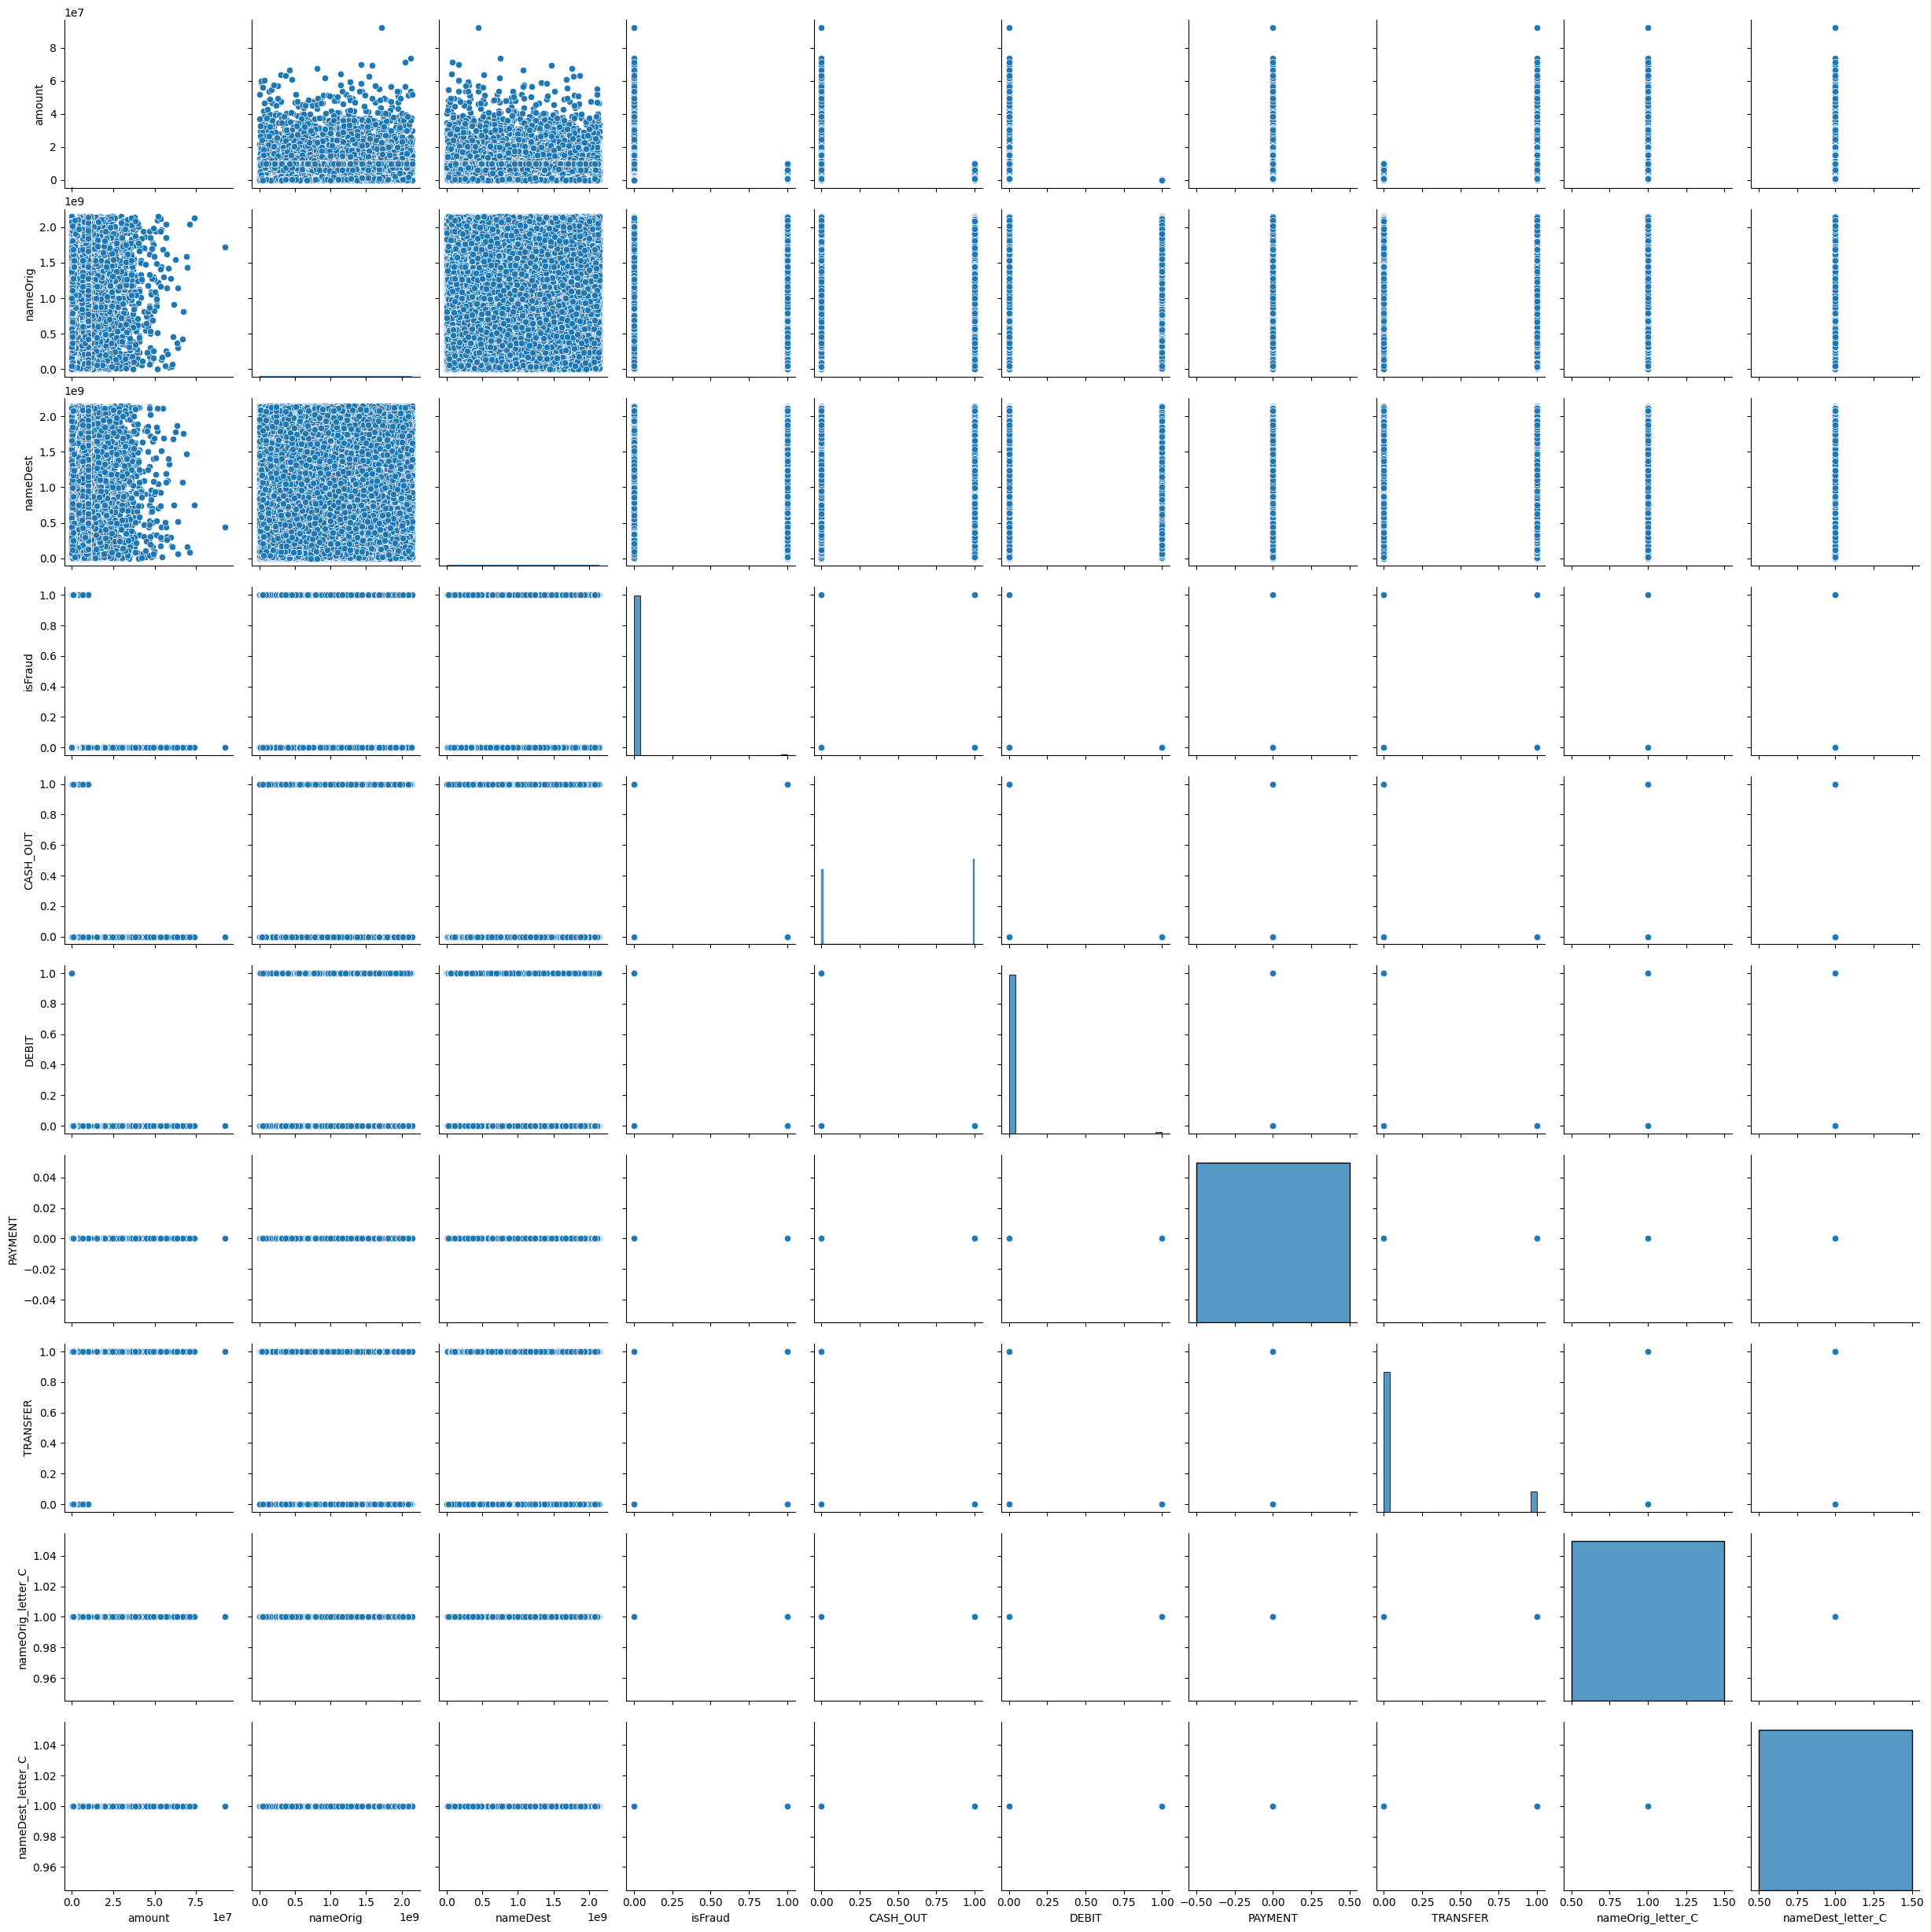

In [51]:
sns.pairplot(model_data)

# model training

In [34]:
X = model_data.drop('isFraud',axis=1)
y = model_data['isFraud']

In [42]:
y.value_counts()

isFraud
0    4202912
1       8213
Name: count, dtype: int64

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [45]:
y_test.value_counts()

isFraud
0    1260806
1       2532
Name: count, dtype: int64

### standardising the data for modelling

In [63]:
scaler = StandardScaler()

In [64]:
scaled_X_train = scaler.fit_transform(X_train)

In [65]:
scaled_X_test = scaler.transform(X_test)

# using stochastic gradient descent (SGD) learning

In [66]:
sgd = SGDClassifier()

In [67]:
sgd.fit(scaled_X_train,y_train)

SGDClassifier()

In [68]:
sgd_pred = sgd.predict(scaled_X_test)

In [69]:
# creating the classification report 

print("\nClassification Report:")
print(classification_report(y_test, sgd_pred))


Classification Report:


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1260806
           1       0.00      0.00      0.00      2532

    accuracy                           1.00   1263338
   macro avg       0.50      0.50      0.50   1263338
weighted avg       1.00      1.00      1.00   1263338



C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
accuracy_score(y_true=y_test,y_pred=sgd_pred)

0.997995785767546

# random forest 

In [71]:
rfc = RandomForestClassifier()

In [72]:
rfc.fit(scaled_X_train,y_train)

In [ ]:
rfc_pred = rfc.predict(scaled_X_test)

In [ ]:
# creating the classification report 

print("\nClassification Report:")
print(classification_report(y_test, rfc_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1260806
           1       0.82      0.15      0.25      2532

    accuracy                           1.00   1263338
   macro avg       0.91      0.57      0.63   1263338
weighted avg       1.00      1.00      1.00   1263338



In [ ]:
accuracy_score(y_true=y_test,y_pred=rfc_pred)

0.9982285025860063

# logistic regression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(scaled_X_train,y_train)

LogisticRegression()

In [ ]:
log_pred = log.predict(scaled_X_test)

In [ ]:
# creating the classification report 

print("\nClassification Report:")
print(classification_report(y_test, rfc_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1260806
           1       0.82      0.15      0.25      2532

    accuracy                           1.00   1263338
   macro avg       0.91      0.57      0.63   1263338
weighted avg       1.00      1.00      1.00   1263338



In [ ]:
accuracy_score(y_true=y_test,y_pred=log_pred)

0.9979752053686345

In [3]:
pd.DataFrame({'Model Name': ['SGDClassifier','RandomForestClassifier','LogisticRegression'],'ACCURACY': [99.79,99.82,99.79]})

,Model Name,ACCURACY
0,SGDClassifier,99.79
1,RandomForestClassifier,99.82
2,LogisticRegression,99.79
